In [1]:
import numpy as np
import pandas as pd

In [2]:
# extracting the data from output

file1 = open('homework.txt', 'r')
Lines = file1.readlines()


data = []

for line in Lines:
    if "E[" in line:
        ta = 'training Acc: '
        va = 'val Acc: '
        PT = 'Parallel threads '
        #print(line)

        ind_ta = line.find(ta)
        ind_va = line.find(va)
        ind_PT = line.find(PT)

        ta_value = float(line[ind_ta+len(ta):ind_ta+len(ta)+5])
        va_value = float(line[ind_va+len(va):ind_va+len(va)+5])
        PT_value = float((line[ind_PT+len(PT):ind_PT+len(PT)+3]).replace(',', ''))
        data.append([int(line[2:4].replace(']', '')), ta_value, va_value, PT_value])

In [3]:
df_data = pd.DataFrame(data, columns=['epoch', 'train_accuracy', 'validation_accuracy', 'parallel_threads'])

In [4]:
p_dict = {
    16.0: 'n=1',
    32.0: 'n=2',
    64.0: 'n=4',
    128.0: 'n=8',
}

df_data['n'] = df_data.parallel_threads.map(p_dict)

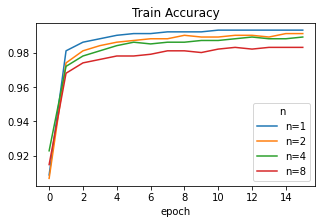

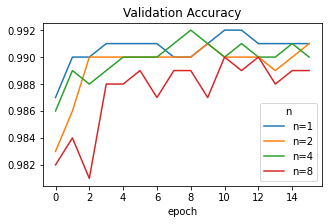

In [5]:
df = df_data.iloc[:79-15].pivot(index='epoch', columns='n', values='train_accuracy')
ax = df.plot.line(figsize=(5, 3), title='Train Accuracy')
ax.figure.savefig('train_accuracy.pdf')

df = df_data.iloc[:79-15].pivot(index='epoch', columns='n', values='validation_accuracy')
ax = df.plot.line(figsize=(5, 3), title='Validation Accuracy')
ax.figure.savefig('validation_accuracy.pdf')